In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [63]:
df = pd.read_csv('books.csv')
df.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          6810 non-null   int64  
 1   isbn10          6810 non-null   object 
 2   title           6810 non-null   object 
 3   subtitle        2381 non-null   object 
 4   authors         6738 non-null   object 
 5   categories      6711 non-null   object 
 6   thumbnail       6481 non-null   object 
 7   description     6548 non-null   object 
 8   published_year  6804 non-null   float64
 9   average_rating  6767 non-null   float64
 10  num_pages       6767 non-null   float64
 11  ratings_count   6767 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 638.6+ KB


In [65]:
df.shape

(6810, 12)

## EDA

Missing values in subtitles

In [66]:
len(df['categories'].value_counts())

567

567 distinct categories

Text(50.58159722222221, 0.5, 'Missing Values')

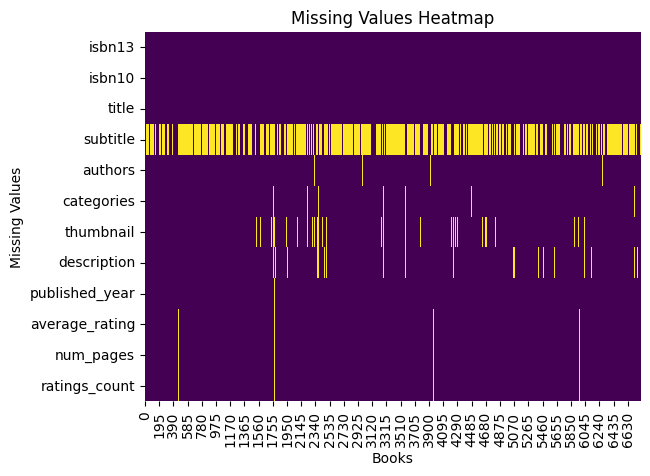

In [67]:
axs = plt.axes()
sns.heatmap(df.isna().T, ax=axs, cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.xlabel('Books')
plt.ylabel('Missing Values')

## Creating Columns

In [68]:
df['missing_description'] = np.where(df['description'].isna(), 1, 0)
df['age_of_books'] = 2024 - df['published_year']

In [69]:
columns_of_interest = ['num_pages', 'age_of_books', 'missing_description', 'average_rating']

In [70]:
coorelation_matrix = df[columns_of_interest].corr(method='spearman')
coorelation_matrix

,num_pages,age_of_books,missing_description,average_rating
num_pages,1.000000,-0.016623,-0.012317,0.154642
age_of_books,-0.016623,1.000000,0.130712,0.091645
missing_description,-0.012317,0.130712,1.000000,0.041533
average_rating,0.154642,0.091645,0.041533,1.000000


There is not a coorelations which implies no biasness in our dataset

In [71]:
rows_with_missing = df[df.isnull().any(axis=1)]
rows_with_missing

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_books
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,20.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,42.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,31.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,22.0
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,22.0
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,21.0
6806,9788185944609,8185944601,Secrets Of The Heart,NaN,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVp...,NaN,1993.0,4.08,74.0,324.0,1,31.0
6807,9788445074879,8445074873,Fahrenheit 451,NaN,Ray Bradbury,Book burning,NaN,NaN,2004.0,3.98,186.0,5733.0,1,20.0


## Deleting irrelevant Rows

In [72]:
df = df[(~df['description'].isna()) & (~df['published_year'].isna()) & (~df['num_pages'].isna()) & (~df['average_rating'].isna())]

Since they are less than 5% we simply delete them

In [73]:
df.shape

(6507, 14)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6507 entries, 0 to 6809
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   isbn13               6507 non-null   int64  
 1   isbn10               6507 non-null   object 
 2   title                6507 non-null   object 
 3   subtitle             2281 non-null   object 
 4   authors              6444 non-null   object 
 5   categories           6474 non-null   object 
 6   thumbnail            6293 non-null   object 
 7   description          6507 non-null   object 
 8   published_year       6507 non-null   float64
 9   average_rating       6507 non-null   float64
 10  num_pages            6507 non-null   float64
 11  ratings_count        6507 non-null   float64
 12  missing_description  6507 non-null   int64  
 13  age_of_books         6507 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 762.5+ KB


In [75]:
df_sorted_by_categories_count=df['categories'].value_counts().reset_index().rename(columns={'index': 'category', 'category': 'count'}).sort_values(by='count', ascending=False)
df_sorted_by_categories_count

,categories,count
0,Fiction,2523
1,Juvenile Fiction,534
2,Biography & Autobiography,391
3,History,258
4,Literary Criticism,164
...,...,...
526,English essays,1
527,Inventions,1
528,Building laws,1
529,LITERARY CRITICISM,1


Uneven distribution of categories

In [76]:
df.head(10)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_books
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,20.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,24.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,42.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,31.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,22.0
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,22.0
6,9780006353287,0006353282,An Autobiography,NaN,Agatha Christie,"Authors, English",http://books.google.com/books/content?id=c49GQ...,Donation.,1977.0,4.27,560.0,3975.0,0,47.0
7,9780006380832,0006380832,Empires of the Monsoon,A History of the Indian Ocean and Its Invaders,Richard Hall,"Africa, East",http://books.google.com/books/content?id=MuPEQ...,Until Vasco da Gama discovered the sea-route t...,1998.0,4.41,608.0,65.0,0,26.0
8,9780006470229,000647022X,The Gap Into Madness,Chaos and Order,Stephen R. Donaldson,"Hyland, Morn (Fictitious character)",http://books.google.com/books/content?id=4oXav...,A new-cover reissue of the fourth book in the ...,1994.0,4.15,743.0,103.0,0,30.0
9,9780006472612,0006472613,Master of the Game,NaN,Sidney Sheldon,Adventure stories,http://books.google.com/books/content?id=TkTYp...,Kate Blackwell is an enigma and one of the mos...,1982.0,4.11,489.0,43540.0,0,42.0


In [77]:
df['words_in_description'] = df['description'].apply(lambda x: len(str(x).split()))

In [78]:
df['words_in_description']

0       199
1       205
2        14
3        57
4        45
       ... 
6803     63
6804    117
6805    174
6808    245
6809     20
Name: words_in_description, Length: 6507, dtype: int64

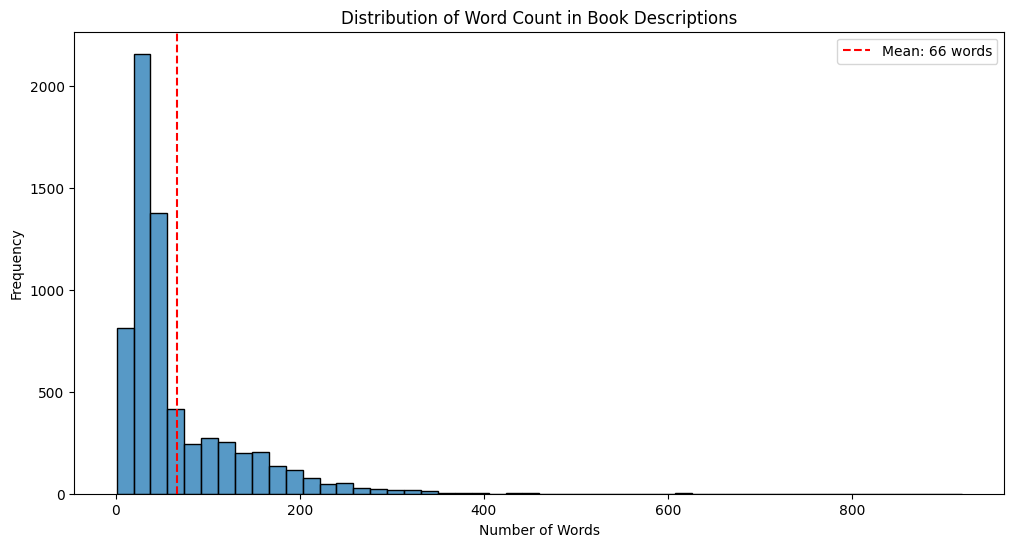

In [79]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='words_in_description', bins=50)
plt.title('Distribution of Word Count in Book Descriptions')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.axvline(x=df['words_in_description'].mean(), color='red', linestyle='--', label=f'Mean: {df["words_in_description"].mean():.0f} words')
plt.legend()
plt.show()

In [80]:
df.loc[df['words_in_description'].between(1,4), 'description']

6                                           Donation.
11                                     Fantasy-roman.
748              Includes bibliographical references.
770                             Bound For Oregon (PB)
775                                No Marketing Blurb
812                                No Marketing Blurb
857                          First published in 1813.
944                         Edited by Maurice Hindle.
953                        DEFOE/ROBINSON CRUSOE (BC)
954                             Edited by John Carey.
962                         ALLEN/GETTING THINGS DONE
1054                            GILBERT/EAT PRAY LOVE
1056    "Graham Greene centennial, 1904-2004"--Cover.
1060                   STEINBECK/GRAPES OF WRATH (BC)
1346                                   Fantasy-roman.
1546                                      Winter 2003
1610                                      Winter 1999
1813                             National bestseller.
1981                        

In [81]:
df.loc[df['words_in_description'].between(5,14), 'description']


2       Volume Two of Stephen Donaldson's acclaimed se...
38      Koko is Peter Straub's foray into the psycholo...
70      A matter of life and death - and the Throne of...
77                         Nonsense rhyming story. 4 yrs+
84      A study guide for the novel There's a Boy in t...
                              ...                        
6715    The first comprehensive guide to addressing Na...
6726       Presents two complete novels from Henry James.
6757                          Audio Book- unabriged on CD
6776    Raymond Chandler meets The Exorcist. Classic n...
6795    Book Of Five Rings is a Kodansha International...
Name: description, Length: 308, dtype: object

In [83]:
df.loc[df['words_in_description'].between(15,24), 'description']

10      One of Sidney Sheldon's most popular and bests...
32      Tells the story of three generations of Chines...
36      A magical and fantastic collection of early st...
57      A young drifter finds more than he bargained f...
68      A new 'The Doors of Perception' for the 21st c...
                              ...                        
6767    Everything from the fingerprints of the gods t...
6782    Displays one of America's leading physicist's ...
6783    Basics Illustration 01: Thinking Visually expl...
6789    Provides an introduction to the American artis...
6809    This is a jubilant and rewarding collection of...
Name: description, Length: 947, dtype: object

In [84]:
df.loc[df['words_in_description'].between(25,34), 'description']


9       Kate Blackwell is an enigma and one of the mos...
14      Available in the U.S. for the first time, this...
20      It is 1937, and Charles Ashworth, a Canon to t...
21      Reissue of the author's most famous and well-l...
46      No one believes a little girl when she insists...
                              ...                        
6760    Joel, an English teacher, has never really lik...
6766    Discusses the historical and intellectual back...
6775    Presents nearly one thousand recipes--from app...
6779    Edited by the creator and executive producer o...
6799    This book is the story of a young girl obsesse...
Name: description, Length: 1229, dtype: object

In [85]:
filtered_df = df[df['words_in_description'] < 25]
print(f"Number of books with descriptions less than 25 words: {len(filtered_df)}")
filtered_df[['title', 'description', 'words_in_description']].sort_values('words_in_description')

Number of books with descriptions less than 25 words: 1310


,title,description,words_in_description
6,An Autobiography,Donation.,1
11,Assassin's Apprentice,Fantasy-roman.,1
6794,ゲンジモノガタリ,源氏物語54帖、「宮田切り絵」の真骨頂。,1
6721,The Value of X,Horror.,1
6368,Tuf Voyaging,undefined,1
...,...,...,...
2224,The Wolves in the Walls,"Lucy hears sneaking, creeping, crumpling noise...",24
36,A Small Pinch of Weather,A magical and fantastic collection of early st...,24
3117,The Pleasure of Finding Things Out,A collection of short works by the noted scien...,24
3081,Feeding the Hungry Heart,Describes the experiences of compulsive eaters...,24


In [86]:
df = df[df['words_in_description'] >= 25]

In [87]:
df.shape

(5197, 15)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5197 entries, 0 to 6808
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   isbn13                5197 non-null   int64  
 1   isbn10                5197 non-null   object 
 2   title                 5197 non-null   object 
 3   subtitle              1817 non-null   object 
 4   authors               5165 non-null   object 
 5   categories            5167 non-null   object 
 6   thumbnail             5031 non-null   object 
 7   description           5197 non-null   object 
 8   published_year        5197 non-null   float64
 9   average_rating        5197 non-null   float64
 10  num_pages             5197 non-null   float64
 11  ratings_count         5197 non-null   float64
 12  missing_description   5197 non-null   int64  
 13  age_of_books          5197 non-null   float64
 14  words_in_description  5197 non-null   int64  
dtypes: float64(5), int64(3), o

In [91]:
df['title'] = df.apply(lambda x: f"{x['title']}: {x['subtitle']}" if pd.notna(x['subtitle']) else x['title'], axis=1)

In [92]:
df.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_books,words_in_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,20.0,199
1,9780002261982,0002261987,Spider's Web: A Novel,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,24.0,205
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,31.0,57
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,22.0,45
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,22.0,75


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5197 entries, 0 to 6808
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   isbn13                5197 non-null   int64  
 1   isbn10                5197 non-null   object 
 2   title                 5197 non-null   object 
 3   subtitle              1817 non-null   object 
 4   authors               5165 non-null   object 
 5   categories            5167 non-null   object 
 6   thumbnail             5031 non-null   object 
 7   description           5197 non-null   object 
 8   published_year        5197 non-null   float64
 9   average_rating        5197 non-null   float64
 10  num_pages             5197 non-null   float64
 11  ratings_count         5197 non-null   float64
 12  missing_description   5197 non-null   int64  
 13  age_of_books          5197 non-null   float64
 14  words_in_description  5197 non-null   int64  
dtypes: float64(5), int64(3), o

In [96]:
df['tagged_description'] = df['isbn13'].astype(str) + " " + df['description']

In [97]:
df.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_books,words_in_description,tagged_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,20.0,199,9780002005883 A NOVEL THAT READERS and critics...
1,9780002261982,0002261987,Spider's Web: A Novel,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,24.0,205,9780002261982 A new 'Christie for Christmas' -...
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,31.0,57,"9780006178736 A memorable, mesmerizing heroine..."
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,22.0,45,9780006280897 Lewis' work on the nature of lov...
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,22.0,75,"9780006280934 ""In The Problem of Pain, C.S. Le..."


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5197 entries, 0 to 6808
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   isbn13                5197 non-null   int64  
 1   isbn10                5197 non-null   object 
 2   title                 5197 non-null   object 
 3   subtitle              1817 non-null   object 
 4   authors               5165 non-null   object 
 5   categories            5167 non-null   object 
 6   thumbnail             5031 non-null   object 
 7   description           5197 non-null   object 
 8   published_year        5197 non-null   float64
 9   average_rating        5197 non-null   float64
 10  num_pages             5197 non-null   float64
 11  ratings_count         5197 non-null   float64
 12  missing_description   5197 non-null   int64  
 13  age_of_books          5197 non-null   float64
 14  words_in_description  5197 non-null   int64  
 15  tagged_description    5197

In [99]:
df = df.drop(['subtitle', 'missing_description', 'age_of_books', 'words_in_description'], axis=1)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5197 entries, 0 to 6808
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   isbn13              5197 non-null   int64  
 1   isbn10              5197 non-null   object 
 2   title               5197 non-null   object 
 3   authors             5165 non-null   object 
 4   categories          5167 non-null   object 
 5   thumbnail           5031 non-null   object 
 6   description         5197 non-null   object 
 7   published_year      5197 non-null   float64
 8   average_rating      5197 non-null   float64
 9   num_pages           5197 non-null   float64
 10  ratings_count       5197 non-null   float64
 11  tagged_description  5197 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 527.8+ KB


In [101]:
df.to_csv('books_preprocessed.csv', index=False)